In [33]:
# Data Science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.dates as mdates

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func

In [2]:
# Create engine using the `spacex.sqlite` database file
engine = create_engine("sqlite:///../Resources/santa_barbara_food.sqlite")

In [3]:
# INSPECT to confirm existence

# Create the inspector and connect it to the engine
inspector_gadget = inspect(engine)

# Collect the names of tables within the database
tables = inspector_gadget.get_table_names()

# print metadata for each table
for table in tables:
    print(table)
    print("-----------")
    
    # get columns
    columns = inspector_gadget.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

santa_barbara_food
-----------
business_id TEXT
name TEXT
address TEXT
city TEXT
state TEXT
postal_code BIGINT
latitude FLOAT
longitude FLOAT
stars FLOAT
review_count BIGINT
categories TEXT
user_id TEXT
review_stars BIGINT
date TEXT



In [4]:
# build the query
query = """
        SELECT *
        FROM santa_barbara_food
        """

df = pd.read_sql(text(query), con=engine)
df.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,categories,user_id,review_stars,date
0,8-ZExybRuyyXZf6aESgc3g,Paseo Nuevo Shopping Center,651 Paseo Nuevo,Santa Barbara,CA,93101,34.418991,-119.699996,3.3,7,American (Traditional),HA4rae4Oj41vctbk5VFq8w,5,2021-03-11
1,8-ZExybRuyyXZf6aESgc3g,Paseo Nuevo Shopping Center,651 Paseo Nuevo,Santa Barbara,CA,93101,34.418991,-119.699996,3.3,7,American (Traditional),27hyqoJVv66JN_Z8pduSBA,1,2021-07-11
2,8-ZExybRuyyXZf6aESgc3g,Paseo Nuevo Shopping Center,651 Paseo Nuevo,Santa Barbara,CA,93101,34.418991,-119.699996,3.3,7,American (Traditional),E-UATD6Qg2VikGZ2Mtc7sg,1,2021-11-09
3,8-ZExybRuyyXZf6aESgc3g,Paseo Nuevo Shopping Center,651 Paseo Nuevo,Santa Barbara,CA,93101,34.418991,-119.699996,3.3,7,American (Traditional),MvfjsTrQgnCtD3xm3Yg9cw,4,2021-06-12
4,8-ZExybRuyyXZf6aESgc3g,Paseo Nuevo Shopping Center,651 Paseo Nuevo,Santa Barbara,CA,93101,34.418991,-119.699996,3.3,7,American (Traditional),Aofw4GTSxQeYtbhUwD2ZJg,2,2021-04-25


In [ ]:
# user inputs
user_region = 'All'
user_min_attempts = 0

# switch on user_region
if user_region == 'All':
    where_clause = "and 1=1"
else:
    where_clause = f"and region = '{user_region}'"

# build the query
query = f"""
    SELECT
        name,
        full_name,
        region,
        launch_attempts,
        launch_successes
    FROM
        launchpads
    WHERE
        launch_attempts >= {user_min_attempts}
        {where_clause}
    ORDER BY
        launch_attempts DESC;

In [25]:
# Define User Inputs (x=date range, y=avg.stars of user reviews )

# Pick a restaurant name
restaurant = "All"
restaurant = "La Super-Rica Taqueria"

# Select a date range
start_date = '2020-01-01'
end_date = '2023-01-01'

start_date = '2020-01-01'
end_date = '2023-01-01'


In [26]:
# Pick a restaurant name
restaurant = "La Super-Rica Taqueria"

# Select a date range
start_date = '2020-01-01'
end_date = '2023-01-01'





# # switch on user_region
# if user_region == 'All':
#     where_clause = "and 1=1"
# else:
#     where_clause = f"and region = '{user_region}'"






# build the query
query = f"""
    SELECT
        name,
        review_stars,
        date
    FROM
        santa_barbara_food
    WHERE
        name = :restaurant
        AND date BETWEEN :start_date AND :end_date
    ORDER BY
        name
"""

# execute query
params = {'restaurant': restaurant, 'start_date': start_date, 'end_date': end_date}
df2 = pd.read_sql(text(query), con=engine, params=params)
df2.head(10)


,name,review_stars,date
0,La Super-Rica Taqueria,4,2021-03-26
1,La Super-Rica Taqueria,5,2021-03-20
2,La Super-Rica Taqueria,5,2021-01-04
3,La Super-Rica Taqueria,3,2021-04-05
4,La Super-Rica Taqueria,5,2021-04-05
5,La Super-Rica Taqueria,3,2021-05-23
6,La Super-Rica Taqueria,2,2021-03-15
7,La Super-Rica Taqueria,2,2021-05-03
8,La Super-Rica Taqueria,5,2021-05-27
9,La Super-Rica Taqueria,5,2021-04-12


C:\Users\nb51\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


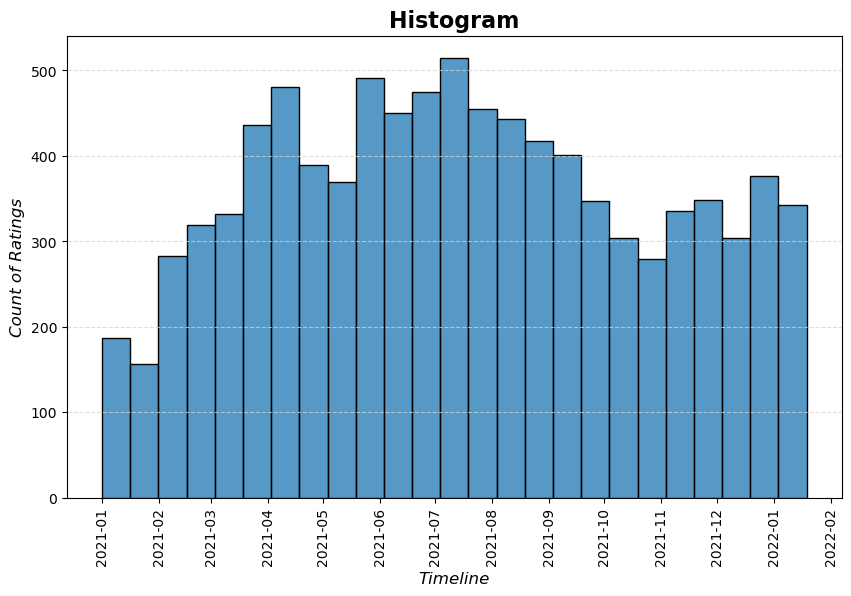

In [46]:
# Histogram
# Dataset
df.date = pd.to_datetime(df['date'])
df2.date = pd.to_datetime(df2['date'])

# Plot for chart_data
plt.figure(figsize=(10,6))
sns.histplot(df, x='date')

# customizations
plt.title("Histogram", fontsize=16, fontweight="bold")
plt.xlabel("Timeline", fontstyle="italic", fontsize=12)
plt.ylabel("Count of Ratings", fontstyle="italic", fontsize=12)

# Format the x-axis dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Set major ticks every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format ticks as 'YYYY-MM'

plt.xlim()
plt.ylim()
plt.xticks(rotation=90)
plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.75)

# save chart in Charts folder
# plt.savefig('../Charts/success_vs_failure_US.png', bbox_inches='tight')

# show
plt.show()

C:\Users\nb51\AppData\Local\Temp\ipykernel_8708\1505105699.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(df2, x='date', y='review_stars', palette='prism')


<Figure size 600x1000 with 0 Axes>

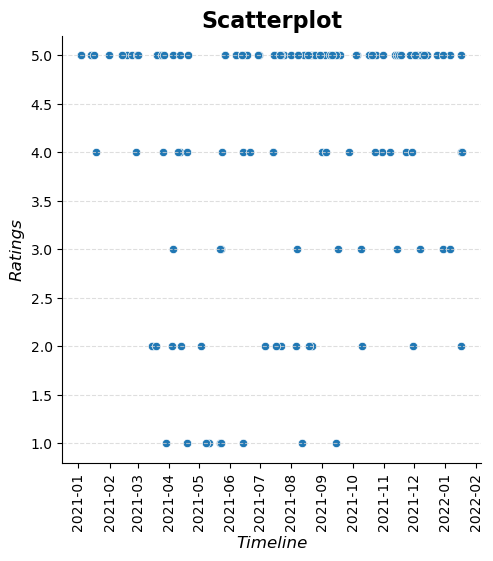

In [49]:
# Scatterplot
# Dataset
df.date = pd.to_datetime(df['date'])
df2.date = pd.to_datetime(df2['date'])

# Plot for chart_data
plt.figure(figsize=(6, 10))
sns.relplot(df2, x='date', y='review_stars', palette='prism')

# customizations
plt.title("Scatterplot", fontsize=16, fontweight="bold")
plt.xlabel("Timeline", fontstyle="italic", fontsize=12)
plt.ylabel("Ratings", fontstyle="italic", fontsize=12)

# Format the x-axis dates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Set major ticks every 3 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format ticks as 'YYYY-MM'

plt.xlim()
plt.ylim()
plt.xticks(rotation=90)
plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.75)

# save chart in Charts folder
# plt.savefig('../Charts/success_vs_failure_US.png', bbox_inches='tight')

# show
plt.show()